### $$\textit{Roots Searching using Bisection, Regula False, Secant and Newton Raphson methods}$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.rcParams["figure.figsize"] = (8,8)

In [21]:
def bisection(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = (a_n + b_n)/2
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            print("Found exact solution.")
            return c_n
        else:
            print("Bisection method fails.")
            return None
    return (n,(a_n + b_n)/2)

def secant(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            return (n,c_n)
        else:
            print("Secant method fails.")
            return None
    return (n,a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)))

def regulaFalsi(f,a,b,TOL,N):
    for n in range(0,N):
        while abs(b-a) > TOL:
            c = (a*f(b)-b*f(a))/(f(b) - f(a))
            FA = f(a)
            Fc = f(c)
            if(Fc == 0) :
                break
            if(f(a)*f(b)) > 0:
                break
            if(FA*Fc > 0):
                a = c
            else:
                b = c
    return (n,c)

def newtonRaphson(f,Df,x0,TOL,N):
    xn = x0
    for n in range(0,N):
        fxn = f(xn)
        if abs(fxn) < TOL:
            return (n,xn)
        Dfxn = Df(xn)
        xn = xn - fxn/Dfxn
    return (n,xn)

Q1. When you deduce Wien’s displacement law from Planck’s law, you finally arrive at an equation $x=3(1-\exp(-x))$ , where $x=\large\frac{\hbar\omega_m}{kT}$. 

Solve this equation to deduce Wien’s displacement law.

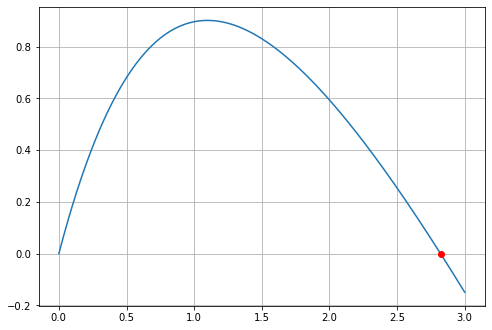

Direct read using scipy : 2.821439372065212 

	Theoritical study
_________________________________________________________________________
| s.No. |	 method 	|  itterations 	|  roots   		|
| --------------------------------------------------------------------- |
|  0 	|	 bisection 	|   25 		| 2.8214405328035355 	|
| --------------------------------------------------------------------- |
|  1 	|	 secant 	|   22 		| 2.8214393721220787 	|
| --------------------------------------------------------------------- |
|  2 	|	 regulaFalsi 	|   24 		| 2.8214393721220787 	|
| --------------------------------------------------------------------- |
|  3 	|	 newtonRaphson 	|   5 		| 2.821439372122079 	|
|_______________________________________________________________________|


In [22]:
f=lambda x:3*(1-np.exp(-x))-x
Df=lambda x:(3*np.exp(-x))-1

a,b = 1,100
TOL,N=1e-15,25
x=np.linspace(0,3,10000)
t=fsolve(f,[a,b])[0]
plt.plot(x,f(x),t,0,'ro')
plt.grid()
plt.show()

A=["bisection","secant","regulaFalsi","newtonRaphson"]
A1=bisection(f,a,b,N)
A2=secant(f,a,b,N)
A3=regulaFalsi(f,a,b,TOL,N)
A4=newtonRaphson(f,Df,x0=a+0.5,TOL=1e-15,N=25)
print('Direct read using scipy :',t,'\n\n\tTheoritical study')
print('_________________________________________________________________________')
print('| s.No.','|\t','method','\t| ','itterations','\t|',' roots ',' \t\t|')
for i in range(4):
    B=[A1,A2,A3,A4]
    print('| --------------------------------------------------------------------- |')
    print('| ',i,'\t|\t',A[i],'\t|  ',B[i][0],'\t\t|',B[i][1],'\t|')
print('|_______________________________________________________________________|')    

Q2. Single slit diffraction patterns are found to be proportional to $\large(\frac{\sin{x}}{x})^2$.

Find the first three position of the maximum for $x>0$ by **Bisection, Regula False,Secant and Newton Raphson methods**

_________________________________________________________________________________________________
| Bisection Method 	| Secant Method	 	| Regula Falsi Method 	| Newton Raphson Method |
|-----------------------------------------------------------------------------------------------|
| 4.493409457909063 	| 4.481592653589793 	| 4.556311455491648 	| 4.71238898038469 	|
|-----------------------------------------------------------------------------------------------|
| 7.725251836937707 	| 7.623185307179586 	| 7.637196614143048 	| 7.853981633974483 	|
|-----------------------------------------------------------------------------------------------|
| 10.904121659428899 	| 10.76477796076938 	| 10.81050225500054 	| 10.995574287564276 	|
|_______________________________________________________________________________________________|


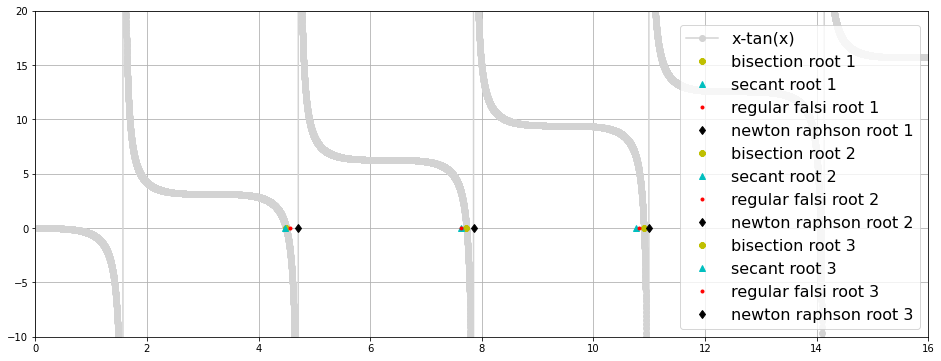

In [4]:
def f(x):
    try :
        y =  x - np.tan(x)
    except:
        y = 0
    return y

def g(x):
    try :
        y = (-np.tan(x))**2
    except:
        y = 0
    return y 

x=np.arange(0,18*np.pi,0.001)
y=f(x)

TOL,N=1e-6,900
A=[np.pi,2*np.pi,3*np.pi]
B=[3*np.pi/2,5*np.pi/2,7*np.pi/2]
C=[4.3,7.4,10.6]
D=[4.7,7.9,11.1]

plt.figure(figsize=(16,6))
plt.ylim(-10,20)
plt.xlim(0,16)
plt.plot(x,y,'o-',label='x-tan(x)',color='lightgrey')
T1,T2,T3,T4=[],[],[],[]
for a,b,c,d in zip(A,B,C,D):
    T1.append(bisection(f,a,b,N)[1])
    T2.append(secant(f,a+1.34,b,N)[1])
    T3.append(regulaFalsi(f,c+.26,d,TOL,N)[1])
    T4.append(newtonRaphson(f,g,d-0.1,TOL,N)[1])
print('_________________________________________________________________________________________________')
print('| Bisection Method','\t|','Secant Method\t','\t|','Regula Falsi Method','\t|','Newton Raphson Method |') 
for i in range(3):    
    print('|-----------------------------------------------------------------------------------------------|')
    print('|',T1[i],'\t|',T2[i],'\t|',T3[i],'\t|',T4[i],'\t|')
    plt.plot(T1[i],x[i],'y8',label='bisection root %i'%(i+1))
    plt.plot(T2[i],x[i],'c^',label='secant root %i'%(i+1))
    plt.plot(T3[i],x[i],'r.',label='regular falsi root %i'%(i+1))
    plt.plot(T4[i],x[i],'kd',label='newton raphson root %i'%(i+1))
print('|_______________________________________________________________________________________________|')  
plt.legend(fontsize=16)
plt.grid()
plt.show()   

Q3.$f(x)=\sin x$ has a root at $x=\pi$. Try Newton Raphson method to find this root with different guess values $x_o\in\large(\frac{\pi}{2},\frac{3\pi}{2})$. 

Output your value of the root in the form of a table.

In [5]:
x   = np.linspace(np.pi/2+0.01,3*np.pi/2+1,20)
print('\n\t\t\t*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
print('_________________________________________________________________________________________') 
print('|\tGuess value','\t\t|','Itterations','\t|\t','Root','\t\t\t\t|')
for x0 in x:
    NR =  newtonRaphson(lambda x: np.sin(x),lambda x: np.cos(x),x0,TOL = 1e-10,N = 10)
    print('|---------------------------------------------------------------------------------------|')
    print('|\t', x0, '\t|\t', NR[0], '\t|\t', NR[1],'\t\t|')
print('|_______________________________________________________________________________________|')    


			*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
_________________________________________________________________________________________
|	Guess value 		| Itterations 	|	 Root 				|
|---------------------------------------------------------------------------------------|
|	 1.5807963267948966 	|	 6 	|	 100.53096491487338 		|
|---------------------------------------------------------------------------------------|
|	 1.798248571720675 	|	 4 	|	 6.283185307179586 		|
|---------------------------------------------------------------------------------------|
|	 2.015700816646454 	|	 5 	|	 3.141592653589801 		|
|---------------------------------------------------------------------------------------|
|	 2.2331530615722324 	|	 4 	|	 3.141592653589793 		|
|---------------------------------------------------------------------------------------|
|	 2.450605306498011 	|	 4 	|	 3.141592653589793 		|
|---------------------------------------------------------------------------------------|
|	 2.668

$\text{Comments : Newton-Raphson Method does not gurantee to find same root for every possible limit}$

### Multi Dimensional Newton Raphson Method

Let us assume that our guess values be $(x_0,y_0)$ while the roots are at $(x^*,y^*)$. 

Let us expand $f(x,y)$ and $g(x,y)$ around upto first order $(x_0,y_0)$.

Let $\displaystyle{x^*=x_0+\eta}$ and $\displaystyle{y^*=y_0+\xi} $

$\displaystyle{f(x,y)=f(x_0,y_0)+(x-x_0)\frac{\partial{f}}{\partial{x}}|_{(x_0,y_0)}+(y-y_0)\frac{\partial{f}}{\partial{y}}|_{(x_0,y_0)} }$

$\displaystyle{f(x^*,y^*)=0=f(x_0,y_0)+\eta\frac{\partial{f}}{\partial{x}}|_{(x_0,y_0)}+\xi\frac{\partial{f}}{\partial{y}}|_{(x_0,y_0)}} $

$\displaystyle{g(x^*,y^*)=0=g(x_0,y_0)+\eta\frac{\partial{g}}{\partial{x}}|_{(x_0,y_0)}+\xi\frac{\partial{g}}{\partial{y}}|_{(x_0,y_0)}}$

If $(x^*,y^*)$ is not the root then iterate again taking $\displaystyle{(x_0,y_0)=(x^*,y^*)}$

Stop if root is found at $\displaystyle{abs(f(x^*,y^*))<tolerance}$ and $\displaystyle{abs(g(x^*,y^*))<tolerance}$

In [6]:
def MD(f,a,root,guess_interval):
    A=[]
    while len(A) < root:
        b=a + guess_interval
        x0=a
        x1=b
        fx0=f(x0)
        fx1=f(x1)  
        if f(x0)*f(x1) < 0:
            while abs(f(x1))>1e-8:
                x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
                x0,x1=x1,x2
                fx0,fx1=f(x1),f(x2)
            A.append(x2)    
        a=b
    return A

Q4. Find all four roots of
$$ x^2+y^2=16,\qquad x*y=2$$
Compare this with your graphical analysis. (Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 -3.968118785067315 	|	 -0.5040171699310841 	|
|	----------------------------------------------------	|
|	 -0.5040171699309133 	|	 -3.96811878506866 	|
|	----------------------------------------------------	|
|	 0.5040171699310768 	|	 3.9681187850673725 	|
|	----------------------------------------------------	|
|	 3.968118785066384 	|	 0.5040171699312024 	|
|_______________________________________________________________|


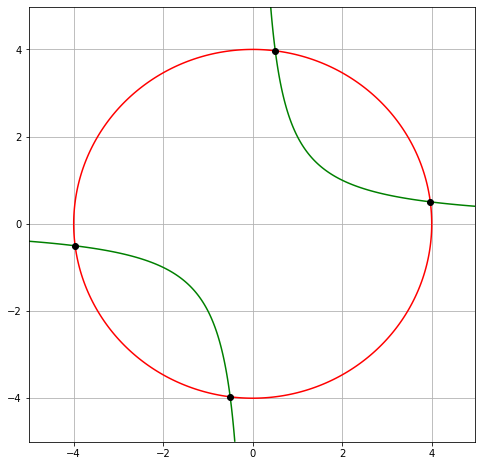

In [27]:
delta = 0.025
xrange = np.arange(-5, 5, delta)
yrange = np.arange(-5, 5, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X*Y)
F = (X**2)+(Y**2)
plt.contour(X, Y,F, [16], colors='red')
plt.contour(X,Y,G,[2], colors='green')

def f(x):
    return (x**2+(2/x)**2)-16

Roots = MD(f, a = -5, root = 4, guess_interval = 0.4)

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    print('|\t----------------------------------------------------\t|')
    print('|\t',i,'\t|\t',2/i,'\t|')
    plt.plot(i,2/i,'ko')
print('|_______________________________________________________________|') 
plt.grid(True)
plt.show()

$\text{Comments :We observe that the theoretical roots matches with the intersecting points of the figures}$

Q5. Find the complex root of
$$z^3+2z^2+1=0$$
Hint write $z=x+iy$ and then separate the given equation into real and imaginary parts. You will get two equations involving $x, y.$

In [8]:
f= lambda x,y :x**3-3*x*y**2+2*x**2-2*y**2+1
g= lambda x,y :3*x**2*y-y**3+4*x*y
tol = 1e-8
def multdim(f,g,x0,y0):
    while abs(f(x0,y0)) > tol and abs(g(x0,y0)) > tol :
        dfdx=2*x0**2-6*y0**2+4*x0
        dfdy=-6*x0*y0-4*y0
        dgdx=6*x0*y0+4*y0
        dgdy=3*x0**2-3*y0**2+4*x0
        a=g(x0,y0)*dfdy-f(x0,y0)*dgdy
        b=f(x0,y0)*dgdx-g(x0,y0)*dfdx
        c=(dfdx*dgdy)-(dgdx*dfdy)
        h=a/c
        k=b/c
        x0=x0+h
        y0=y0+k
    return x0,y0
print('\tTheoritical Study using Multi-Dimensional Method')
print('__________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0 \t\t |')
A=[0.,0.,1.,-1.]
B=[1.,-1.,0.,0.]
for i,j in zip(A,B):
    print('|\t-----------------------------------------------------\t |')
    print('|\t',multdim(f,g,i,j)[0],'\t|\t',multdim(f,g,i,j)[1],'\t |')
print('|________________________________________________________________|')    

	Theoritical Study using Multi-Dimensional Method
__________________________________________________________________
|		 x_0		|		 y_0 		 |
|	-----------------------------------------------------	 |
|	 0.10278353577461553 	|	 0.6654528606181872 	 |
|	-----------------------------------------------------	 |
|	 0.10278353577461553 	|	 -0.6654528606181872 	 |
|	-----------------------------------------------------	 |
|	 1.0 	|	 0.0 	 |
|	-----------------------------------------------------	 |
|	 -1.0 	|	 0.0 	 |
|________________________________________________________________|


Q6.Solve the equation & Compare this with your graphical analysis. :
$$ x\tan x=y,\qquad x^2+y^2=a^2$$
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 -3.595304867149978 	|	 1.7532207253977343 	|
|	----------------------------------------------------	|
|	 -2.133332251659473 	|	 -3.3836213594349682 	|
|	----------------------------------------------------	|
|	 -1.2523532340025878 	|	 3.798896073503873 	|
|	----------------------------------------------------	|
|	 1.2523532340022252 	|	 3.79889607349814 	|
|	----------------------------------------------------	|
|	 2.1333322516655873 	|	 -3.383621359398809 	|
|	----------------------------------------------------	|
|	 3.5953048671691237 	|	 1.753220725492273 	|
|_______________________________________________________________|


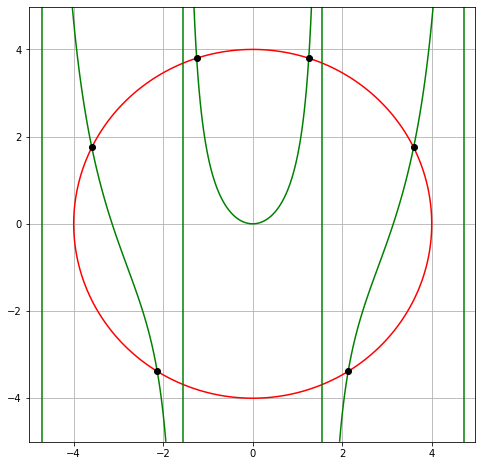

In [28]:
delta = 0.025
xrange = np.arange(-5, 5, delta)
yrange = np.arange(-5, 5, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X*np.tan(X))-Y
F = (X**2)+(Y**2)
plt.contour(X, Y,F, [16], colors='red')
plt.contour(X,Y,G,[0], colors='green')

def f(x):
    return (x**2*(1+(np.tan(x))**2))-16

Roots = MD(f, a = -5, root = 6, guess_interval = 0.4)

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    print('|\t----------------------------------------------------\t|')
    print('|\t',i,'\t|\t',(i*np.tan(i)),'\t|')
    plt.plot(i,(i*np.tan(i)),'ko')
print('|_______________________________________________________________|')    
plt.grid(True)
plt.show()

$\text{Comments :We observe that the theoretical roots matches with the intersecting points of the figures}$

Q7.Solve the equation & Compare this with your graphical analysis.:
$$ x\cot x=-y,\qquad x^2+y^2=a^2$$
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 -7.957321494203958 	|	 0.8252482280379635 	|
|	----------------------------------------------------	|
|	 -7.497754810632315 	|	 -2.789923439744691 	|
|	----------------------------------------------------	|
|	 -5.52144642997628 	|	 5.78909572566379 	|
|	----------------------------------------------------	|
|	 -3.6097188354399323 	|	 -7.139322792033181 	|
|	----------------------------------------------------	|
|	 -2.7859021140778784 	|	 7.4992499232107335 	|
|	----------------------------------------------------	|
|	 2.7859021140778872 	|	 7.499249923210961 	|
|	----------------------------------------------------	|
|	 3.6097188354506384 	|	 -7.139322791864537 	|
|	----------------------------------------------------	|
|	 5.52144642997784 	|	 5.789095725683503 	|
|	--------------

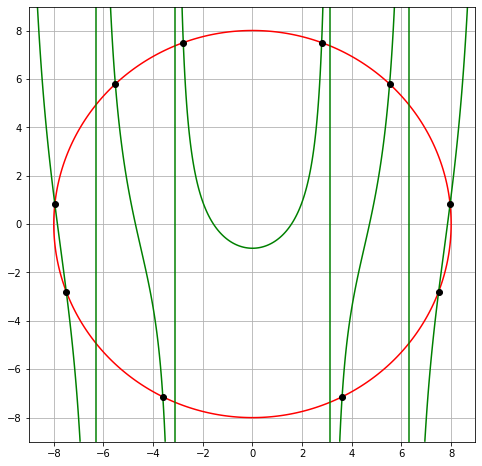

In [29]:
delta = 0.025
xrange = np.arange(-9, 9, delta)
yrange = np.arange(-9, 9, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X/np.tan(X))+Y
F = (X**2)+(Y**2)
plt.contour(X, Y,F, [64], colors='red')
plt.contour(X,Y,G,[0], colors='green')

def f(x):
    return (x**2*(1+(1/(np.tan(x)))**2))-64

Roots = MD(f, a = -8, root = 10, guess_interval = 0.4)

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    print('|\t----------------------------------------------------\t|')
    print('|\t',i,'\t|\t',(-i/np.tan(i)),'\t|')
    plt.plot(i,(-i/np.tan(i)),'ok')
print('|_______________________________________________________________|')    
plt.grid(True)
plt.show()

$\text{Comments :We observe that the theoretical roots matches with the intersecting points of the figures}$

Q8.Energy levels of a particle in a spherical box is given by the equation $j_l(ka)=0$

Where $j_l(x)$ is Spherical Bessel Function of order $l$. There are infinite number
of roots for a given $l$. 

Find the first three roots for each value of $l\in[0,1,2]$.

Energy is given by $\large\frac{\hbar^2(ka)^2}{2ma^2}$. Label the states and arrange them in the increasing value of energy.

For Spherical Bessel function
$\\ \qquad\qquad\textit{from scipy.special import spherical_jn}$

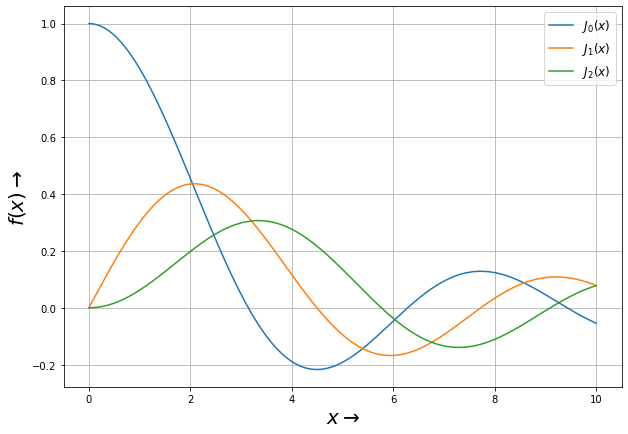

In [11]:
from scipy.special import spherical_jn
x=np.linspace(0,10,50000)
plt.figure(figsize=(10,7))
for l in range(3):
    plt.plot(x,spherical_jn(l,x),label='${J}_%i(x)$'%l)
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=12)
plt.show()    

Observing the bessel fncn. plot to check for the range of the roots.

For Energy , we can say the $\large\frac{\hbar^2}{2ma^2}$ term is considered const. 

And thus neglecting it and focusing on only the $(ka)$ term w.r.t. the $l$ states.

First three roots of j_{0}(ka)  : [3.141, 6.283, 9.424]
First three roots of j_{1}(ka)  : [0.0, 4.493, 7.725]
First three roots of j_{2}(ka)  : [0.0, 5.763, 9.094]


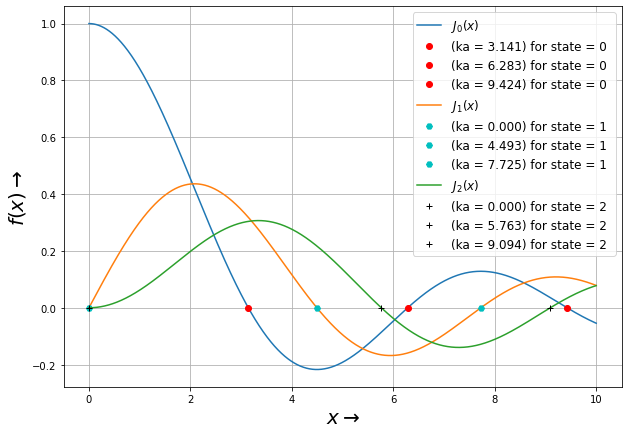

In [12]:
def bisection(f,a,b,tol):
    while (abs(a-b)>=tol):
        c=(a+b)/2
        if (f(a)*f(c)) > tol:
            a=c
        elif (f(a)*f(c)) < tol:  
            b=c
    return c
plt.figure(figsize=(10,7))
col=["ro","cH","k+"]

for l in range(3):
    plt.plot(x,spherical_jn(l,x),label='${J}_%i(x)$'%l)
    L1=[]
    for i in range(0,7):
        s=bisection(lambda x:spherical_jn(l,x),i,10,1e-8)
        #print('bisection(lambda x:spherical_jn(%i,x),%0.1f,10,1e-8) :'%(l,i),s)
        L1.append(round(s,3))
    ka=[i for n, i in enumerate(L1) if i not in L1[:n]]
    ka.sort()   
    print('First three roots of j_{%i}(ka)  :'%l,ka)
    for k in range(len(ka)):
        plt.plot(ka[k],0,col[l],label='(ka = %0.3f) for state = %i '%(ka[k],l))
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=12)
plt.show()

First three roots of j_{0}(ka)  : [3.1415926535897953, 6.283185307179586, 9.424777960769385]
First three roots of j_{1}(ka)  : [0.0, 4.493409457909064, 7.725251836937707]
First three roots of j_{2}(ka)  : [0.0, 5.76345919689455, 9.095011330476355]


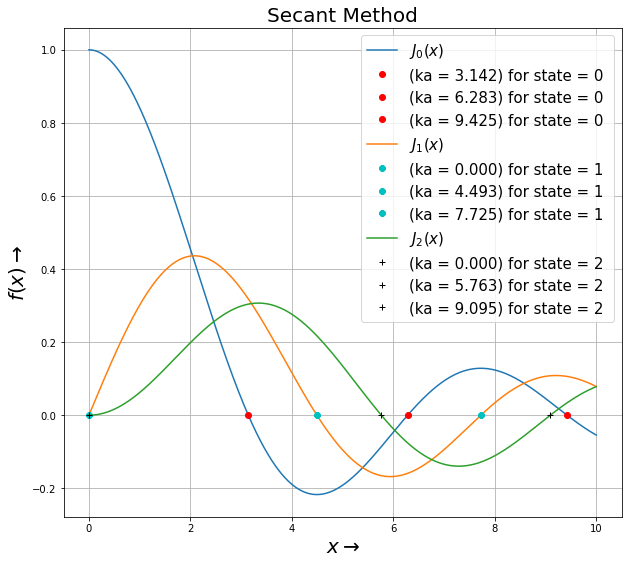

In [15]:
def secant(f,x0,x1):
    if f(x0)*f(x1) >0:
        return ('No root in this interval')
    fx0,fx1=f(x0),f(x1)
    while abs(f(x1))>1e-15:
        x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
        x0,x1=x1,x2
        fx0,fx1=fx1,f(x2)
    return x2

plt.figure(figsize=(10,9))
col = ["ro","c8","k+"]
A = [0.0,4.2,7.5]
B = [3.7,6.5,9.6]
for l in range(3):
    plt.plot(x,spherical_jn(l,x),label='${J}_%i(x)$'%l)
    L2=[]
    for i,j in zip(A,B):
        s=secant(lambda x:spherical_jn(l,x),i,j)
        #print('secant(lambda x:spherical_jn(%i,x),%0.1f,%0.1f,1e-8) :'%(l,i,j),s)
        L2.append(s)
    ka=[i for i in L2]
    ka.sort()     
    print('First three roots of j_{%i}(ka)  :'%l,ka)
    for k in range(len(ka)):
        plt.plot(ka[k],0,col[l],label='(ka = %0.3f) for state = %i '%(ka[k],l))
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=15)
plt.title('Secant Method',fontsize=20)
plt.show()

First three roots of j_{0}(ka)  : [3.1415926535918905, 6.283185318333183, 9.42477796186602]
First three roots of j_{1}(ka)  : [0.0, 4.4934094715765465, 7.725251909765262]
First three roots of j_{2}(ka)  : [0.0, 5.763459197135756, 9.095011331302855]


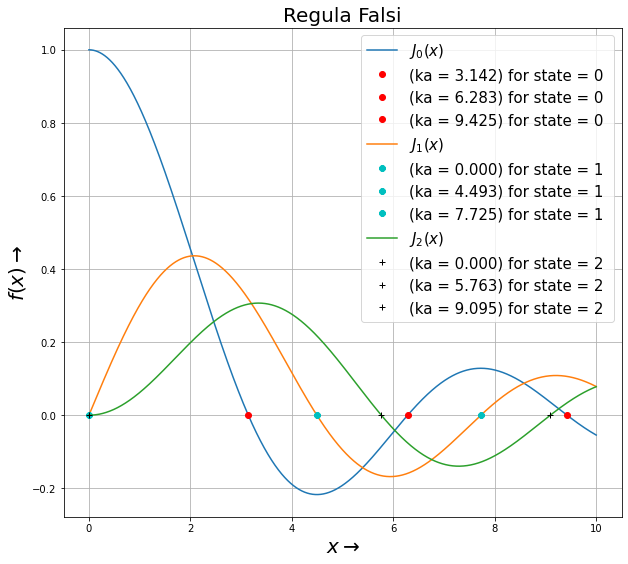

In [16]:
def regula_falsi(f,a,b):   
    c=a
    while abs(f(c))>1e-8 :
        c=a-f(a)*(a-b)/(f(a)-f(b))
        if f(c)*f(a)<0 :
            b=c
        else :
            a=c
    return c

plt.figure(figsize=(10,9))
col = ["ro","c8","k+"]
A = [0.0,4.2,7.5]
B = [3.7,6.5,9.6]
for l in range(3):
    plt.plot(x,spherical_jn(l,x),label='${J}_%i(x)$'%l)
    L3=[]
    for i,j in zip(A,B):
        s=regula_falsi(lambda x:spherical_jn(l,x),i,j)
        #print('regula_falsi(lambda x:spherical_jn(%i,x),%0.1f,%0.1f,1e-8) :'%(l,i,j),s)
        L3.append(s)
    ka=[i for i in L3]
    ka.sort()     
    print('First three roots of j_{%i}(ka)  :'%l,ka)
    for k in range(len(ka)):
        plt.plot(ka[k],0,col[l],label='(ka = %0.3f) for state = %i '%(ka[k],l))
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=15)
plt.title('Regula Falsi Method',fontsize=20)
plt.show()

First three roots of j_{0}(ka)  : [3.141296393610537, 6.282690438255668, 9.42388916797936]
First three roots of j_{1}(ka)  : [6.891787052154541e-09, 4.493115242943168, 7.72456055469811]
First three roots of j_{2}(ka)  : [6.891787052154541e-09, 5.763281258568168, 9.094097908213733]


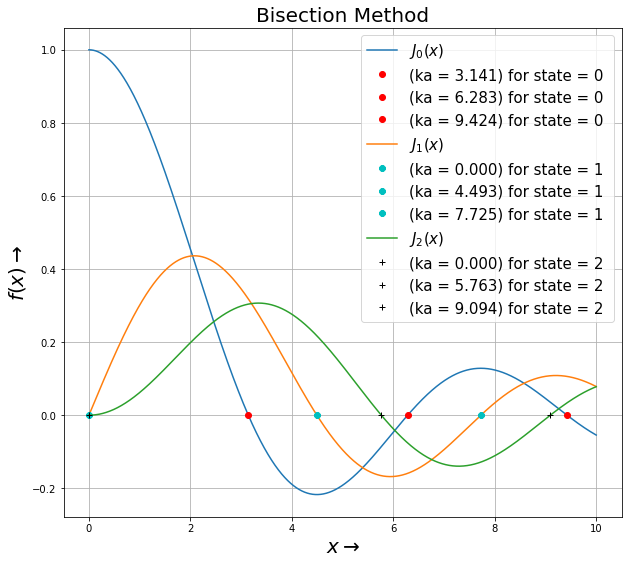

In [19]:
def bisection(f,a,b,tol):
    while (abs(a-b)>=tol):
        c=(a+b)/2
        if (f(a)*f(c)) > tol:
            a=c
        elif (f(a)*f(c)) < tol:  
            b=c
    return c

plt.figure(figsize=(10,9))
col = ["ro","c8","k+"]
A = [0.0,4.2,7.5]
B = [3.7,6.5,9.6]
for l in range(3):
    plt.plot(x,spherical_jn(l,x),label='${J}_%i(x)$'%l)
    L4=[]
    for i,j in zip(A,B):
        s=bisection(lambda x:spherical_jn(l,x),i,j,1e-8)
        #print('regula_falsi(lambda x:spherical_jn(%i,x),%0.1f,%0.1f,1e-8) :'%(l,i,j),s)
        L4.append(s)
    ka=[i for i in L4]
    ka.sort()     
    print('First three roots of j_{%i}(ka)  :'%l,ka)
    for k in range(len(ka)):
        plt.plot(ka[k],0,col[l],label='(ka = %0.3f) for state = %i '%(ka[k],l))
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=15)
plt.title('Bisection Method',fontsize=20)
plt.show()